In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# 6.3. Optimización de carteras

- Descarga los datos del último año de los siguientes activos usando IEX ('AAPL', 'FB', 'JPM', 'BRK.B', 'GOOG'). Denominamos $n$ como el número de activos elegidos.
- Crea un dataframe solo con los datos de cierre, tendrá dimensiones $m \times n$ con $m$ el número de días y $n$ en número de activos.
- Calcula un portfolio aleatorio:
   - Genera uno vector de pesos $\mathbf{w}$ aleatorios de dimensiones $n \times 1$, donde $n$ es el número de activos. Los pesos tienen que cumplir que  $w_i \ge 0, \; i = 1,\dots, n$ y $\sum_{i=1}^{n} w_i = 1$ dado que solo permitimos estar en largo.
   - Calcula el retorno y la desviacion típica del portfolio:
       - $R_p = \mathbf{w^T \mu}$ donde $\mathbf{\mu}$ es un vector con la media de los retornos diarios de los activos, con dimensiones $n \times 1$.
       - $\sigma_p = \sqrt{\mathbf{w}^T\Sigma \mathbf{w}}$, donde $\Sigma$ es la matriz de covarianzas de los retornos, con dimensiones $n \times n$
- Realiza una simulación de montecarlo para ello:
   - Repite el procceso anterior $k$ veces por ejemplo 10000, guardando los pesos $\mathbf{w}$, $R_p$ y $\sigma_p$ de cada experimento.
   - Realiza una figura con todos los puntos.
   - Selecciona el punto de máximo ratio sharpe:
     - Calcula el ratio sharpe para cada uno de los porfolios generados. El ratio sharpe se calcula como:
     \begin{equation*}
     S_p = \frac{R_p - R_f}{\sigma_p}
     \end{equation*}
     asumimos que $R_f$, el retorno del activo sin riesgo, es 0. 
     - Obtén el porfolio con el $S_p$ mayor.
     - Pinta este punto en la figura y obtén los pesos.
      
<center>
<img src="imgs/harry.jpeg"  alt="drawing" width="300"/>
<br />    Harry Markowitz, Novel 1990
</center>

  
   

### Descarga de datos

Descarga los datos de cierre, del último año, de los siguientes tickers: 'AAPL', 'FB', 'JPM', 'BRK.B', 'GOOG'

In [10]:
def get_data_iex(symbol, st_range='1y', closeonly= True):
    
    TOKEN = 'PON AQUÍ TU TOKEN'
    base_url = 'https://cloud.iexapis.com/stable'
    
    XXXXXXXX
    
    return data

Unimos los datos de cierre de los 5 activos en un único DataFrame

In [13]:
XXXXXXX

In [14]:
data_close.head()

,AAPL,FB,JPM,BRK.B,GOOG
date,,,,,
2021-05-28,124.61,328.73,164.24,289.44,2411.56
2021-06-01,124.28,329.13,166.05,289.84,2429.81
2021-06-02,125.06,329.15,166.06,290.02,2421.28
2021-06-03,123.54,326.04,166.17,291.97,2404.61
2021-06-04,125.89,330.35,166.44,292.52,2451.76


Si quiero graficarlo, para ver qué pinta tiene la evolución de las acciones, lo primero que tengo que hacer es dividir cada acción por la 1ª cotización (para que todas empiecen en el mismo punto).

<AxesSubplot:xlabel='date'>

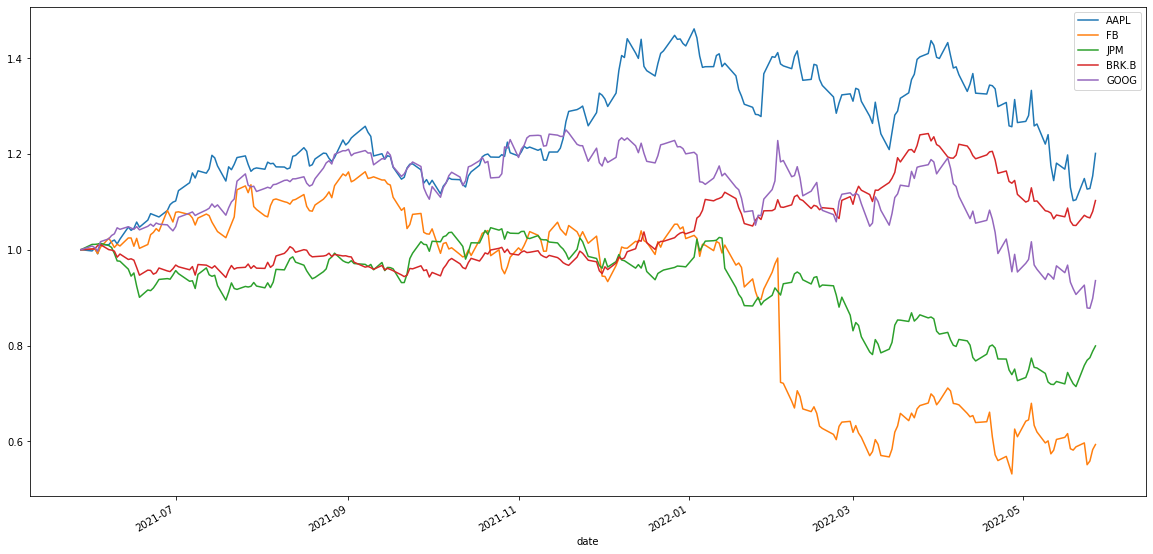

In [38]:
(data_close/data_close.iloc[0]).plot(figsize = (20,10))

### Random porfolio

Vamos a generar 10.000 vectores de pesos aleatorios w, que sumen 1.

Para cada vector de pesos, vamos a calcular la rentabilidad de la cartera y el riesgo de la cartera

- La rentabilidad de la cartera se calcula multiplicando, matricialmente, el vector de media de los retornos * el vector de pesos

- El riesgo de la cartera se calcula como la raiz cuadrada de: la multiplicación matricial del vector de pesos por la matriz de covarianzas, multiplicada de nuevo por el vector de pesos (matricialmente).

In [19]:
returns = XXXXXXXXX

cov_returns = XXXXXXXXX
mean_returns = XXXXXXXXX
    
list_r_p = []
list_std_p = []
list_w = []

for _ in range(10000):
    w = XXXXXXXXX
    r_p = XXXXXXXXX
    std_p = XXXXXXXXX
    
    list_r_p.append(r_p)
    list_std_p.append(std_p)
    list_w.append(w)

Dibujamos todas las carteras que hemos generado. 

- Eje X: Riesgo
- Eje y: Rentabilidad

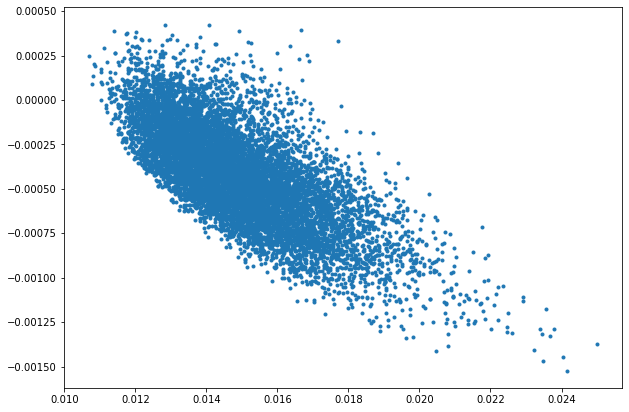

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(list_std_p, list_r_p, '.')

#### Max sharpe ratio portfolio

Calculamos la eficiencia de la cartera a través del ratio de Sharpe: rentabilidad / riesgo

Hacemos este proceso para cada cartera

La cartera que tenga mayor ratio de Sharpe, será la más eficiente

In [24]:
s_r = XXXXXXXXX

# Localizamos la posición de la simulación con mayor ratio 
idx_m_sr = XXXXXXXXX

3733

Recuperamos la información la cartera óptima encontrada: rentabilidad, riesgo y pesos

In [25]:
r_m_sr = arr_r_p[idx_m_sr]
std_m_sr = arr_std_p[idx_m_sr]
w_m_sr = list_w[idx_m_sr]

In [27]:
print(r_m_sr)
print(std_m_sr)
print(w_m_sr)

0.0003892733174446384
0.011389374899648412
[0.33411231 0.00692017 0.01896752 0.5325171  0.1074829 ]


Ponemos los pesos en bonito, para ver la composición de la cartera

In [28]:
pd.Series(w_m_sr, index=cov_returns.columns)

AAPL     0.334112
FB       0.006920
JPM      0.018968
BRK.B    0.532517
GOOG     0.107483
dtype: float64

#### Plot max sharpe ratio portfolio

Dibulamos todas las carteras, y marcamos la cartera óptima encontrada

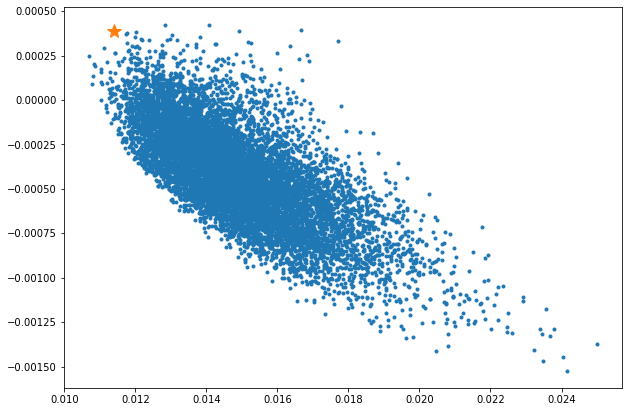

In [29]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(list_std_p, list_r_p, '.')
ax.plot(std_m_sr, r_m_sr, '*', markersize=15)

## Math opt con cvxpy

El problema de la frontera eficiente se puede tratar como un problema de optimización cuadrática.

La frontera eficiente se puede encontrar solucionando el siguiente problema:

\begin{equation*}
\begin{aligned}
& \underset{}{\text{maximize}}
& &  \mathbf{w^T \mu} - \gamma \mathbf{w}^T\Sigma \mathbf{w}\\
& \text{subject to}
& & w_i \ge 0, \; i = 1,\dots, n \\
&&& \sum_{i=1}^{n} w_i = 1
\end{aligned}
\end{equation*}

Donde $\mathbf{w}$ es el vector de pesos a optimizar, $\mathbf{w^T \mu}$ es el retorno del portfolio, $\mathbf{w}^T\Sigma \mathbf{w}$ es la varianza del portfolio y $\gamma$ es un parámetro de adversión al riesgo.

Variando $\gamma$ obtenemos los diferentes puntos de la frontera. 
- Si $\gamma=0$ maximizamos solo el retono 
- Si  $\gamma \rightarrow \infty$ obtenemos el portfolio de mínimo riesgo. 

Variando  $\gamma$  obtenemos el *risk-return trade-off* óptimo.

Puedes encontrar más información en: https://en.wikipedia.org/wiki/Modern_portfolio_theory

Para ejecutar el siguiente código necesitas installar cvxpy: ```pip install cvxpy```

In [32]:
import cvxpy as cp

In [33]:
def optimal_portfolio(returns, n_samples=1000, gamma_low=-1, gamma_high=10):
    sigma = returns.cov().values
    mu = np.mean(returns, axis=0).values  
    n = sigma.shape[0]        
    w = cp.Variable(n)
    gamma = cp.Parameter(nonneg=True)
    ret = mu.T*w
    risk = cp.quad_form(w, sigma)
    
    prob = cp.Problem(cp.Maximize(ret - gamma*risk), 
                      [cp.sum(w) == 1,  w >= 0]) 
    
    risk_data = np.zeros(n_samples)
    ret_data = np.zeros(n_samples)
    gamma_vals = np.logspace(gamma_low, gamma_high, num=n_samples)
    
    portfolio_weights = []    
    for i in range(n_samples):
        gamma.value = gamma_vals[i]
        prob.solve()
        risk_data[i] = np.sqrt(risk.value)
        ret_data[i] = ret.value
        portfolio_weights.append(w.value)   
    return ret_data, risk_data, gamma_vals, portfolio_weights

In [34]:
ret_data, risk_data, gamma_vals, portfolio_weights = optimal_portfolio(returns)

C:\Users\gmele\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


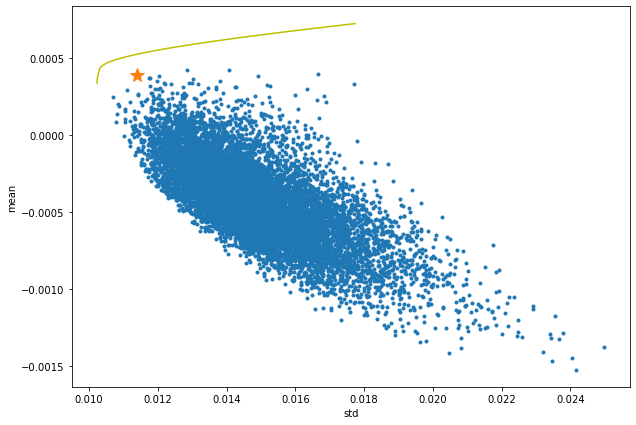

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(list_std_p, list_r_p, '.')
ax.plot(risk_data, ret_data, 'y')
ax.plot(std_m_sr, r_m_sr, '*', markersize=15)
_ = ax.set_xlabel('std')
_ = ax.set_ylabel('mean')

¿Os dáis cuenta de que la frontera está muy por encima de las simulaciones que hemos realizado?, ¿sabríais decirme el motivo?

Estamos trabajando con una foto: ¿Qué significa esta frase?

La optimización de Markowitz tiene diversas críticas. ¿Sabríais decirme alguna?